#### Importing necessary libraries

In [6]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing function to split the data into train and test
from sklearn.model_selection import train_test_split

# Importing function to build linear regression_model
from sklearn.linear_model import LinearRegression

# Importing function to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importing function to build linear regression_model using statsmodels
import statsmodels.api as sm

# Importing function to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [8]:
#Loading the dataset
data = pd.read_csv("used_device_data.csv")

## Data Overview

In [10]:
# Checking the first and last five rows of the dataset, and checking the shape of the dataset
display(data.head(), data.tail())
print("Shape:", data.shape)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


Shape: (3454, 15)


* The dataset was loaded properly
* The dataset has 3454 rows and 15 columns

In [12]:
# Inspecting the column data types in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* The dataset has a mix of object, float, and int data types
* The dependant variable (normalized_used_price) is float datatype
* Some coloumns missing some data in the dataset

In [14]:
# Checking statistical summary of the dataset
data.describe(include="all")

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


* We can see that the prices of used devices vary between 1.54 and 6.62, with an average price of 4.36.
* Android is the dominant operating system among all devices.
* Most devices are equipped with 4G technology.
* The range of release dates varies between 2013 and 2020.

In [16]:
# Checking for duplicates 
data.duplicated().sum()

0

* No duplicates found

In [18]:
# Checking for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* Most missing values are in the column "main_camera_mp".
* There are also a small number of missing values in some other columns.

In [20]:
# Creating a copy of the dataset to preserve original dataset unchanged
df = data.copy()

### Exploratory Data Analysis (EDA)

#### Univariate Analisys

In [25]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

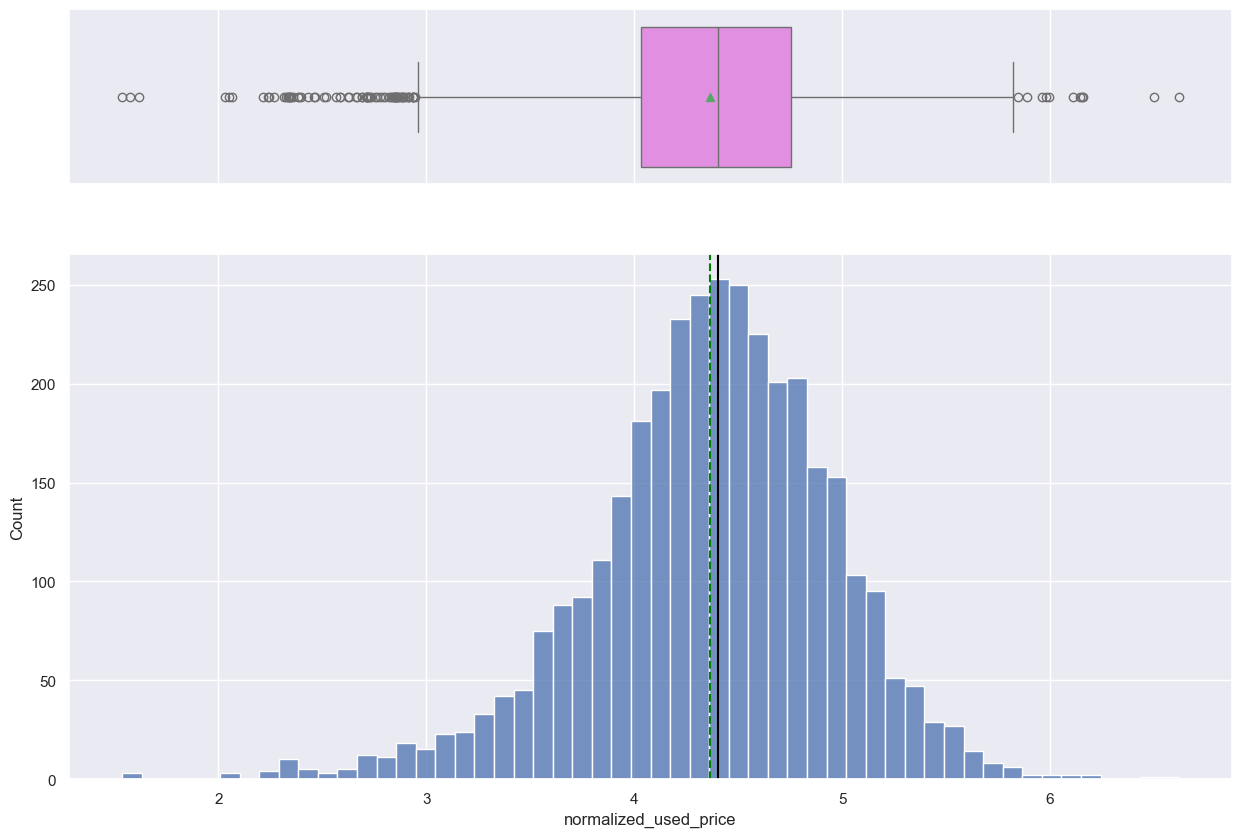

In [27]:
# Histogram and boxplot for normalized used device price
histogram_boxplot(df, "normalized_used_price")

* The normalized used device prices are approximately normally distributed, with a slight skewness to the left.
* The average used price is approximately 4.4.
* There are used price outliers on both the left and right sides of the boxplot.
* The boxplot shows that the price ranges between approximately 4 and 4.8 for the central 50% of the data.
  

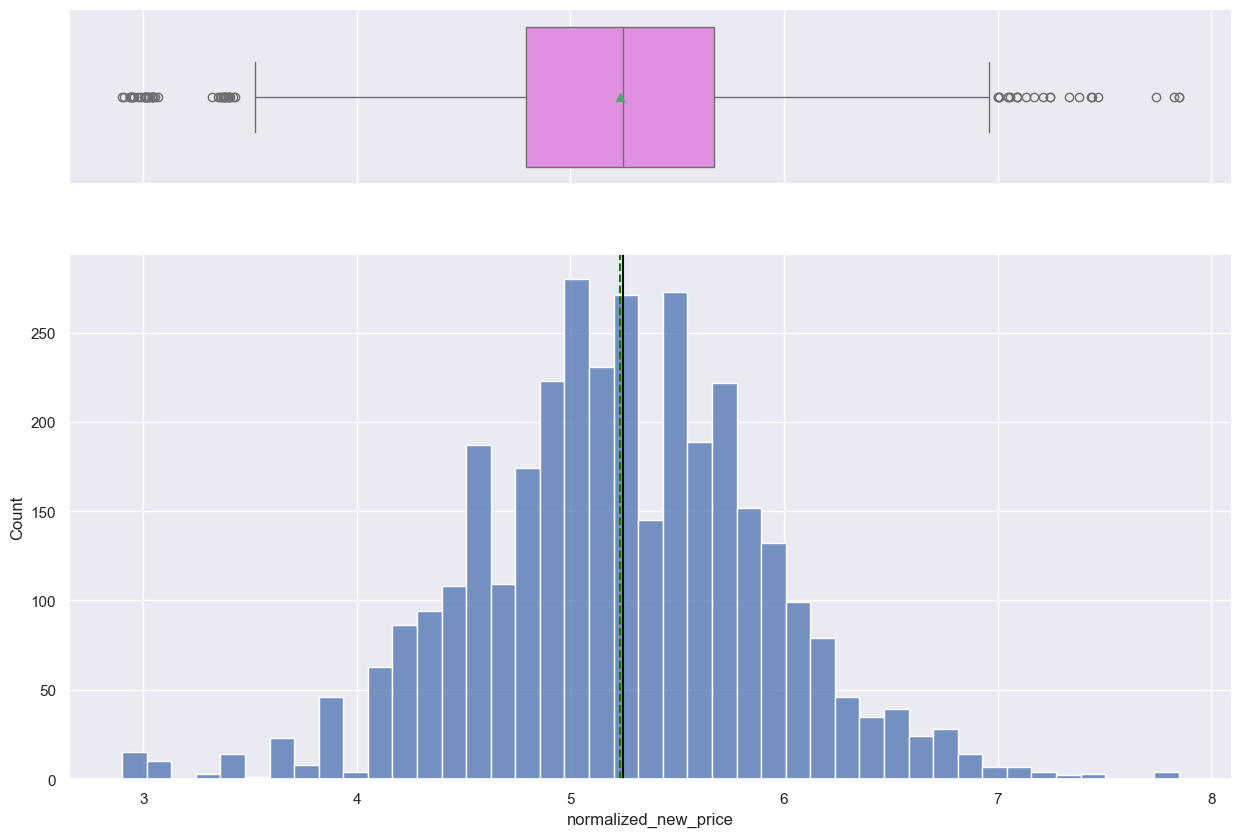

In [29]:
# Histogram and boxplot for normalized new device price
histogram_boxplot(df,'normalized_new_price')

* The normalized new prices are approximately normally distributed.
* The average normalized new price is approximately 5.3.
* The boxplot shows that the price ranges between approximately 4.8 and 5.8 for the central 50% of the data.
* There are outliers on both the left and right sides of the boxplot.

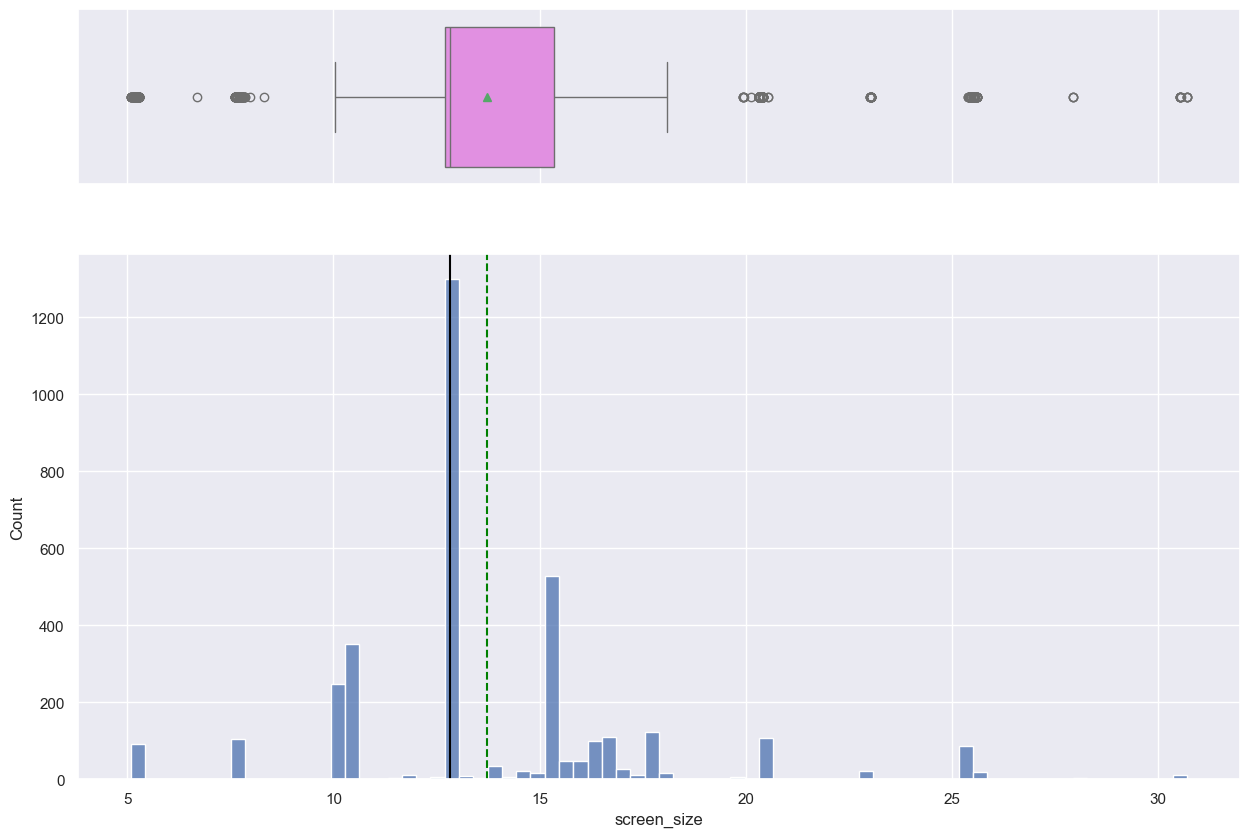

In [31]:
# Histogram and boxplot for screen size in cm
histogram_boxplot(df, 'screen_size')

* The average screen size is approximately 13 cm.
* 50% of devices have screen sizes between 13 and 16 cm
* There are some outliers in the screen sizes

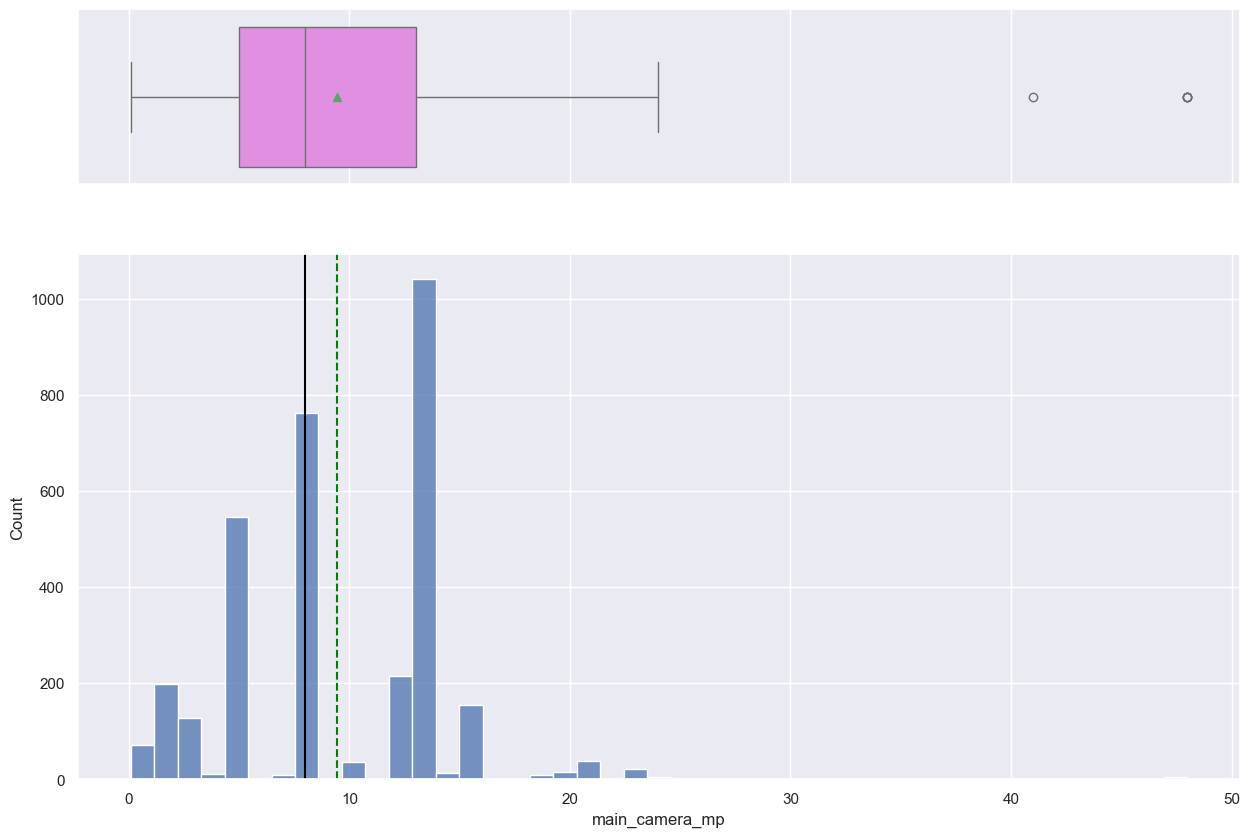

In [33]:
# Histogram and boxplot for main camera mp
histogram_boxplot(df,'main_camera_mp')

* The average main camera MP is almost 10, while the median is around 9.
* Some outliers are present on the right side of the boxplot.

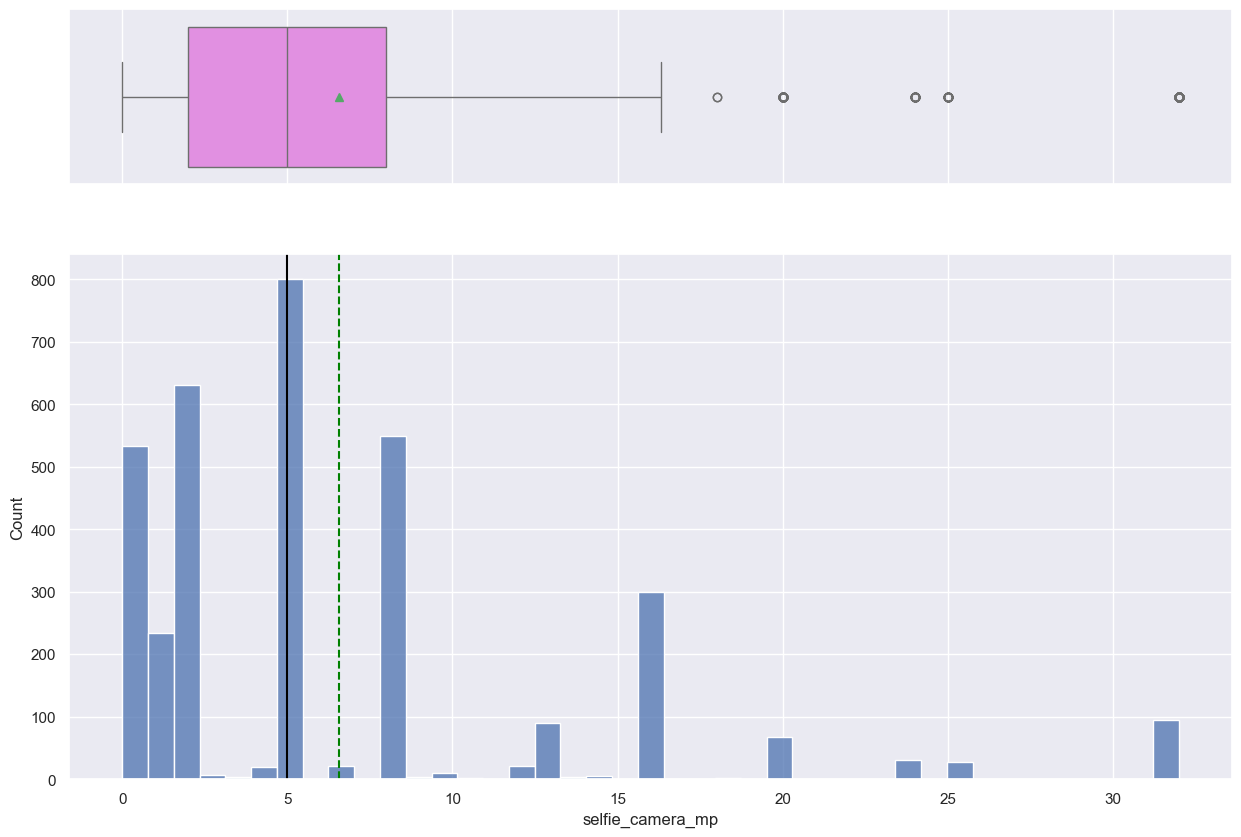

In [35]:
# Histogram and boxplot for selfie camera mp
histogram_boxplot(df, 'selfie_camera_mp')

* The average selfie camera MP is close to 6, while the median is around 5.
* Some outliers are present, indicating that either some devices have much higher MP for the selfie camera than others, or the data might be incorrect.

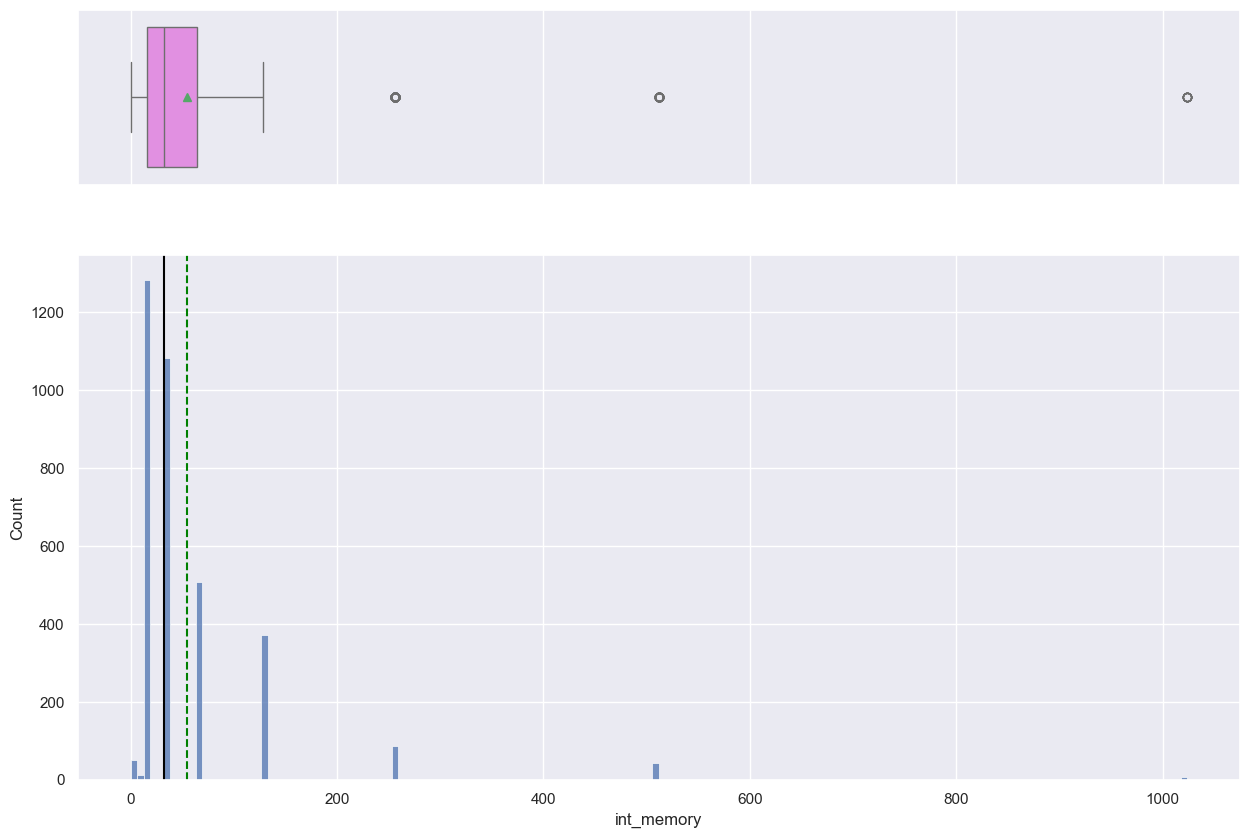

In [37]:
# Histogram and boxplot for internal memory
histogram_boxplot(df, 'int_memory')

* The average internal memory is close to 50, while the median is around 25.
* The size of internal memory is skewed to the right, with some outliers.

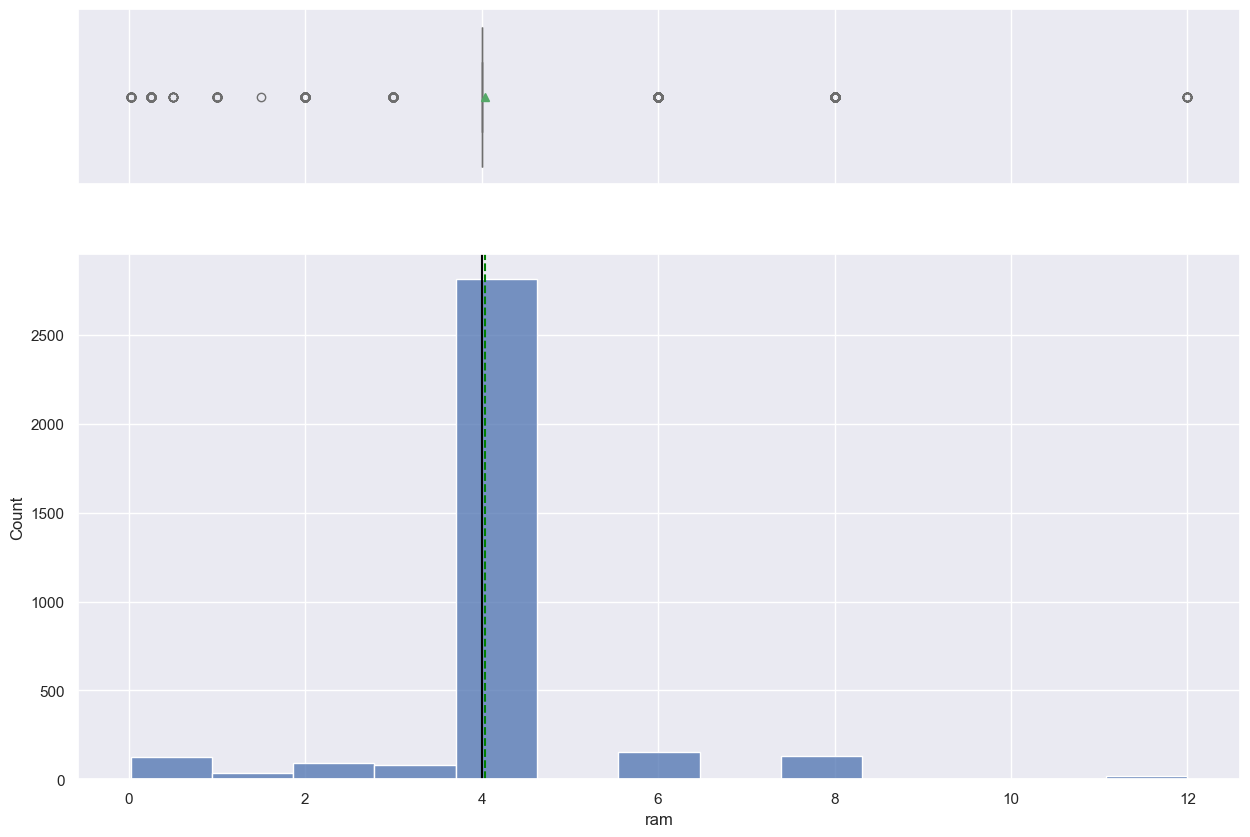

In [39]:
# Histogram and boxplot for RAM
histogram_boxplot(df, 'ram')

* Most of the devises have 4GB RAM 

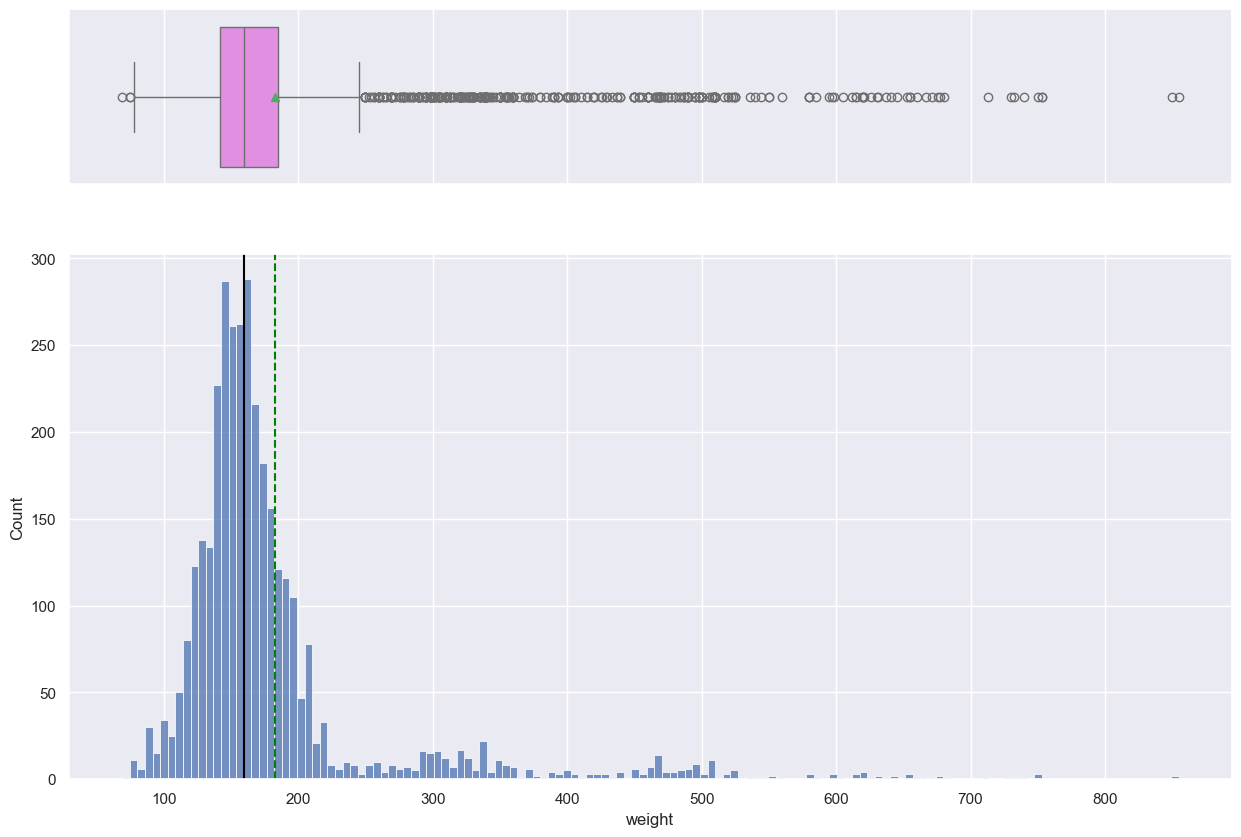

In [41]:
# Histogram and boxplot for weight
histogram_boxplot(df, 'weight')

* The median device weight is approximately 160 grams.
* The graphs are heavily skewed to the right because some devices are significantly heavier than most others. Those most likely are tablets.

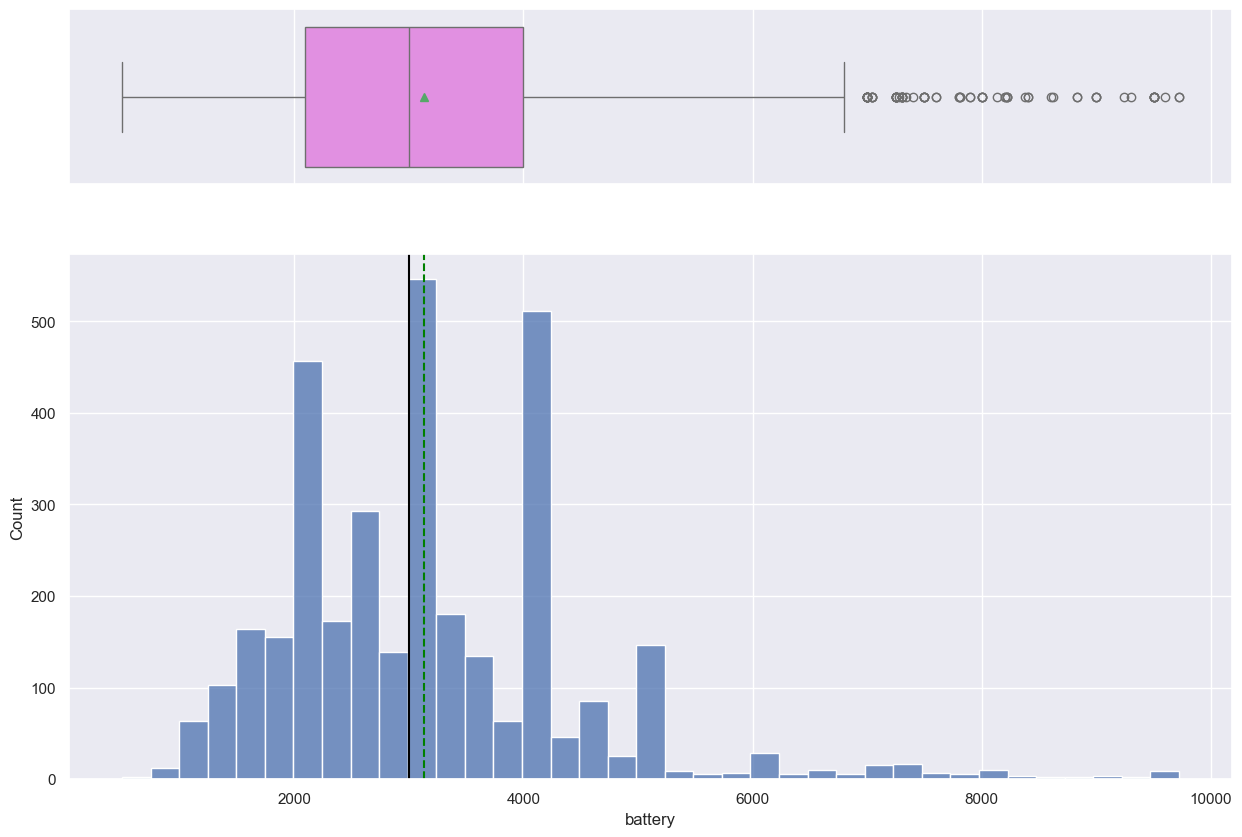

In [43]:
# Histogram and boxplot for battery
histogram_boxplot(df, 'battery')

* The median battery capacity is approximately 3000, while the average battery capacity for all devices is close to 3100.
* Graphs are skewed to the right, which means some devices have much higher battery capacity.  Those likely are tablets.

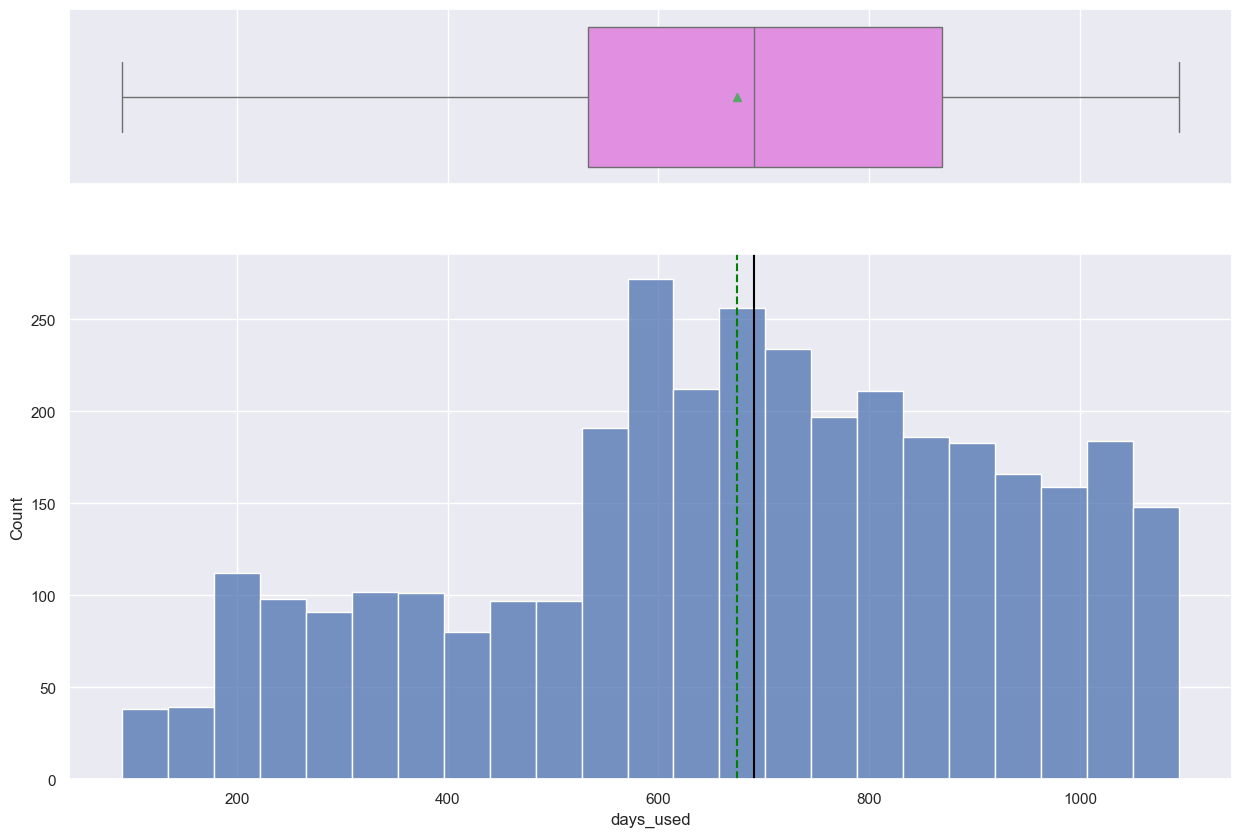

In [45]:
# Histogram and boxplot for days used
histogram_boxplot(df,'days_used') 

* The range of days used is approximately from 100 to 1100.
* The average usage period is approximately 680 days.

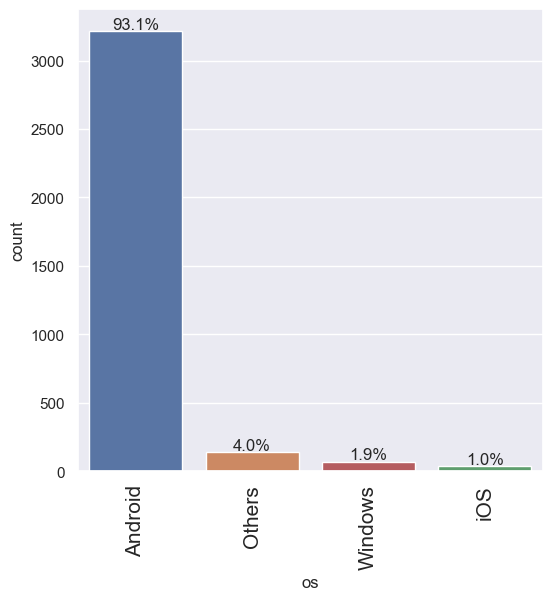

In [47]:
 # Labeled_barplot for 'os' in percentage
labeled_barplot(df, "os", perc=True)

* The market for used devices is dominated by Android OS, with approximately 93% of all devices running Android.

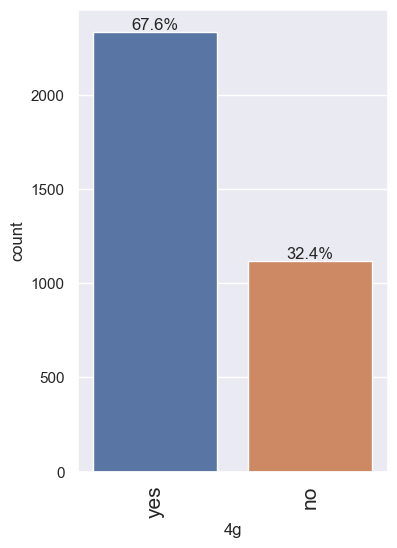

In [49]:
# Labeled_barplot for '4g' in percentage
labeled_barplot(df,'4g',  perc=True)

* 67.6% of devices are equipped with 4G technology.
* 32.4% of devices are not equipped with 4G technology.

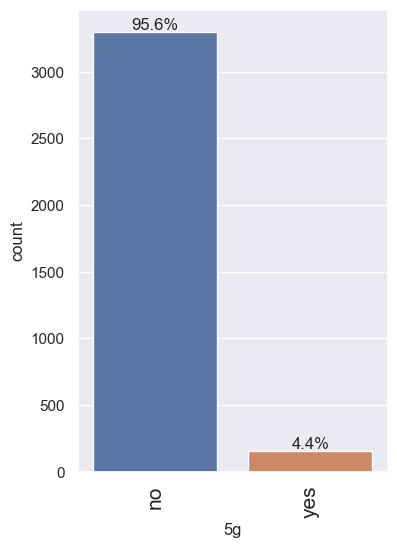

In [51]:
# Labeled_barplot for '5g' in percentage
labeled_barplot(df,'5g',  perc=True)

* Only 4.4% of devices are equipped with 5G technology. The rest are not equipped with 5G

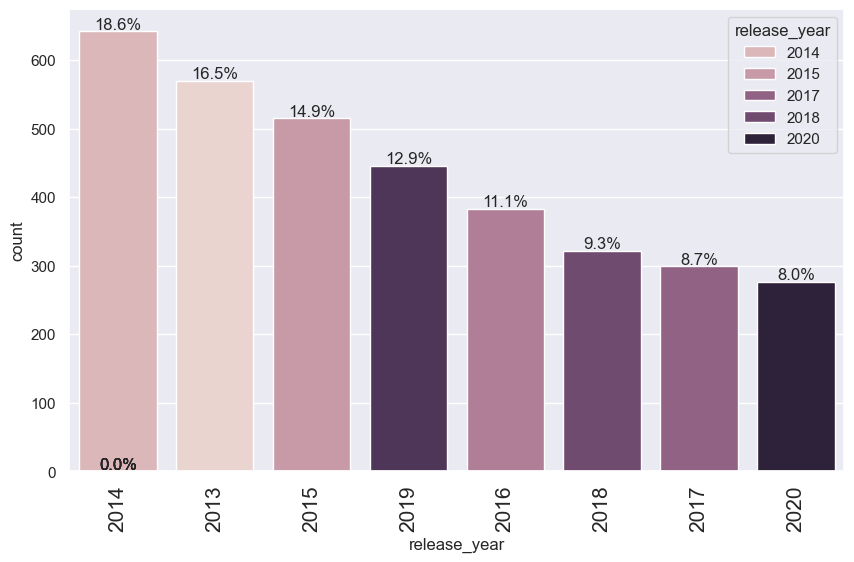

In [53]:
# Labeled_barplot for release year
labeled_barplot(df,'release_year', perc=True)

* The oldest devices in the dataset were released in 2013, while the newest devices are from 2020.
* The largest number of devices is from 2014, whereas the fewest devices are from 2020.

### Bivariate Analysis

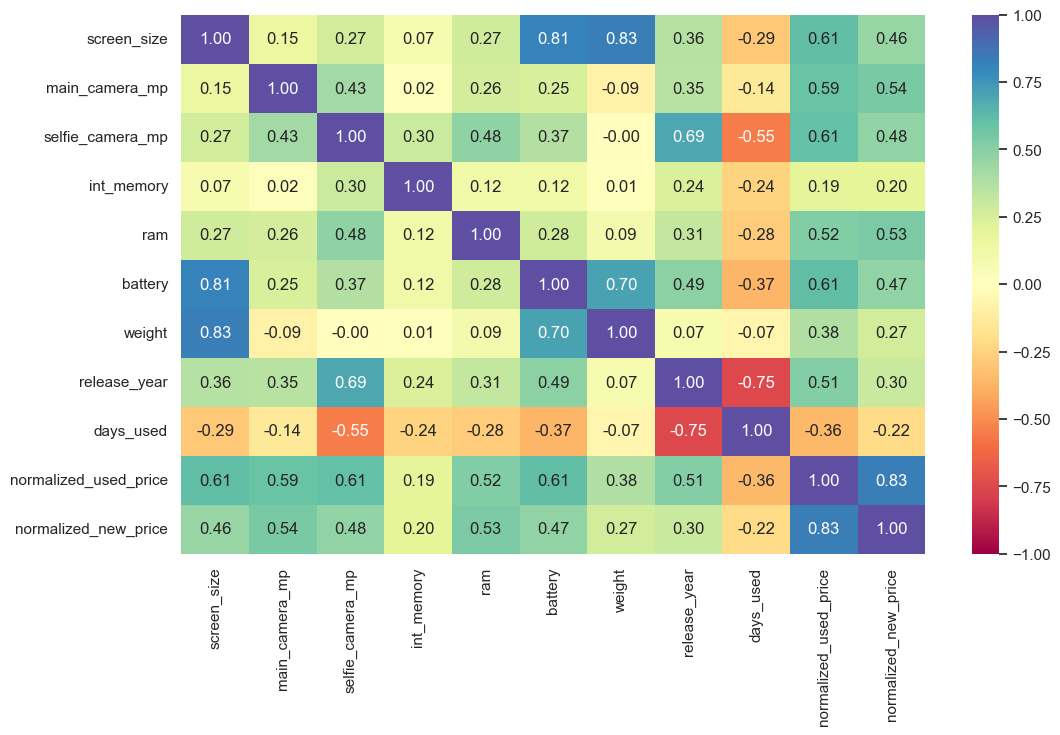

In [56]:
# Creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
# Creating a heatmap to check the correlation between different columns.
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The screen size is highly positively correlated with battery and weight.
* The selfie camera MP is highly positively correlated with the release year.
* The battery is highly positively correlated with weight.
* The release year has a high negative correlation with days used.
* The normalized used price and normalized new price have a high positive correlation.

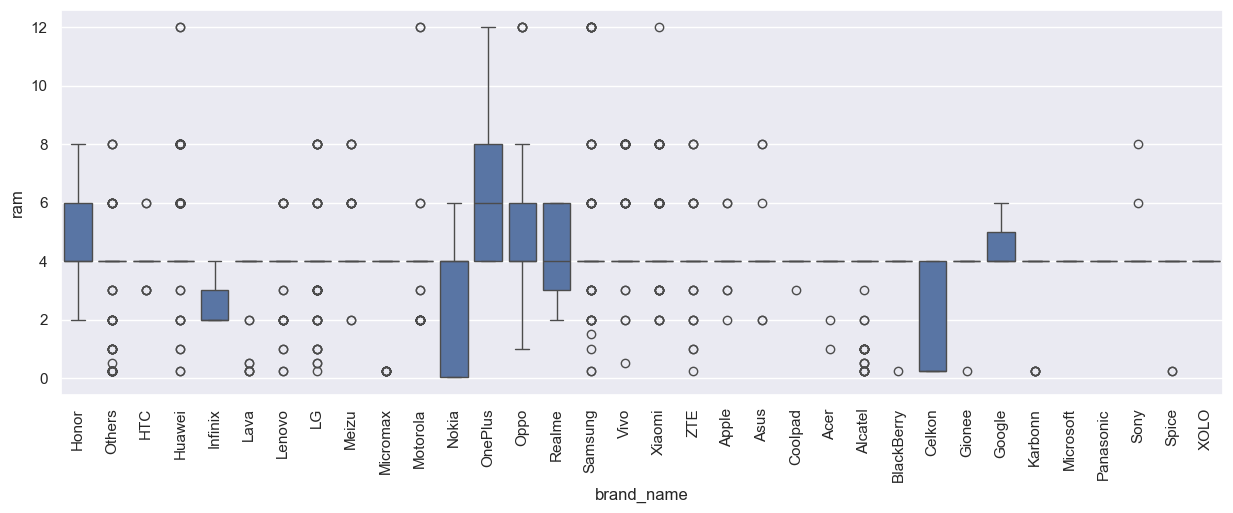

In [58]:
# Checking ram size by brand with boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* RAM varies between 0 and 12 GB. But most brands have median RAM of 4GB.
* The brands with the highest RAM is "OnePlus" and "Oppp", while the brands with the lowest RAM is "Celkon", "Nokia" and "Infinix".

In [60]:
# Creating filtered dataset with device btteries more then 4500 mAh
df_large_battery = df[df.battery > 4500]
print(df_large_battery.shape)
# Creating new dataset with calculated mean values for all clumns grouped by brand name
df_large_battery_mean = df_large_battery.groupby('brand_name')[num_cols].mean().reset_index()
# Creating dataset with sorted means by weight for each brand name
df_large_battery_mean_sorted = df_large_battery_mean.sort_values(by='weight', ascending=True).reset_index(drop=True)
df_large_battery_mean_sorted.shape

(341, 15)


(25, 12)

* The dataset contains 341 items with a battery capacity greater than 4500.
* After calculating the average weight of devices with batteries more than 4500 and grouping them by brand, we have 25 brands in the adjusted dataset.

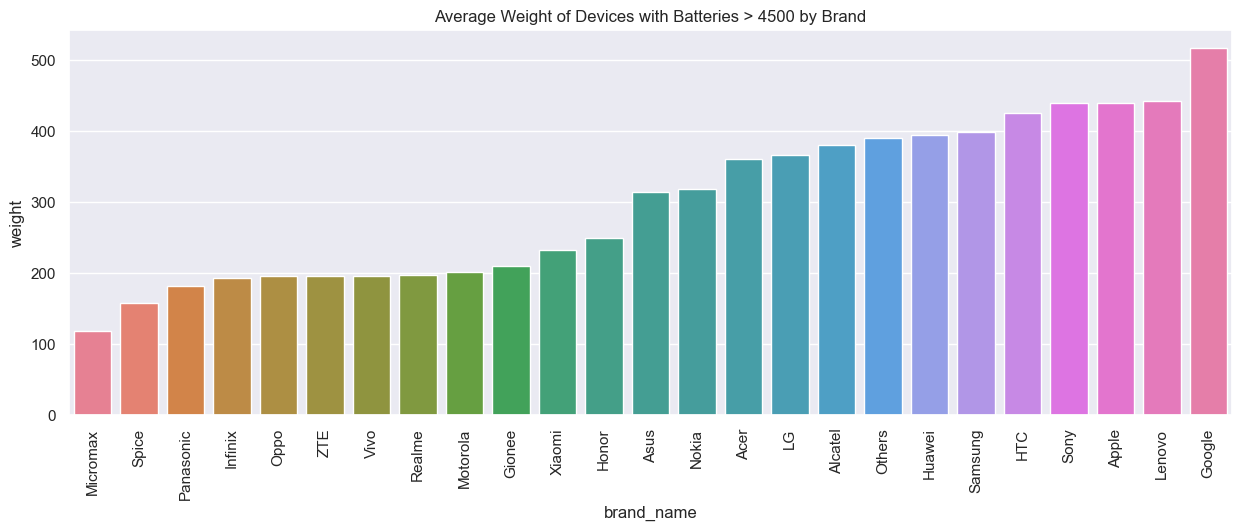

In [62]:
# Checking weight by brand with barplot
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_battery_mean_sorted, x='brand_name', y='weight', hue='brand_name') 
plt.xticks(rotation=90)
plt.title('Average Weight of Devices with Batteries > 4500 by Brand')
plt.show()

* From the graph above, we can see that the brands with the lightest average weight are Micromax, Spice, and Panasonic, while the brands with the heaviest average devices are Google, Lenovo, and Apple.

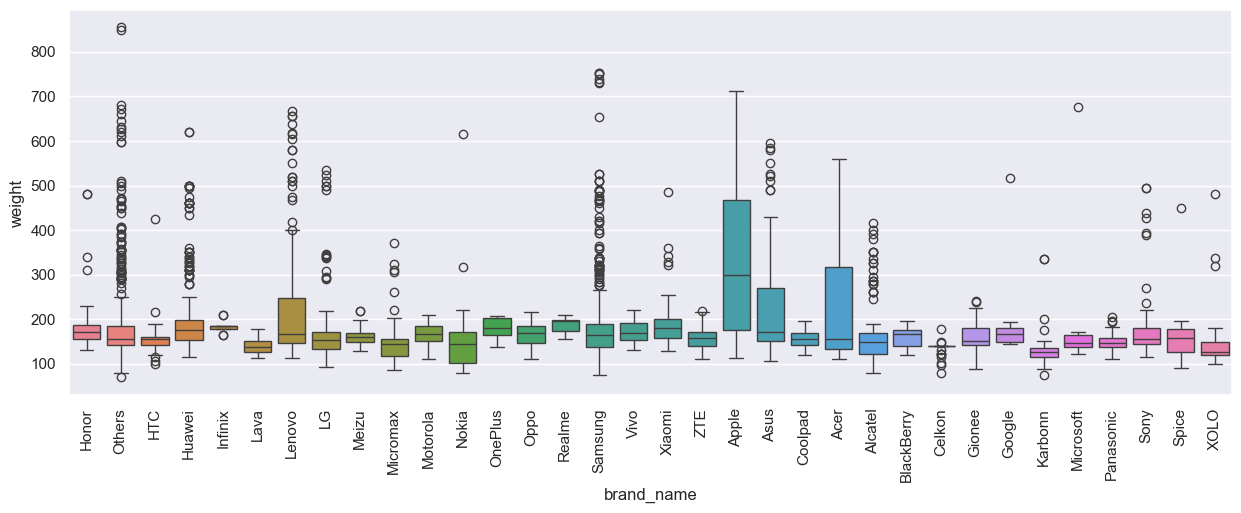

In [64]:
# Let's also check the devices weight destribution with boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='brand_name', y='weight', hue='brand_name')
plt.xticks(rotation=90)
plt.show()

* From the boxplot graph above, we can see that the median device weight for most brands is between 120 and 180 grams.
* Only Apple devices stand out, with a median weight nearly double that of other brands, around 300 grams.
* Some brands, such as Huawei, Lenovo, LG, Samsung, Asus, and Alcatel, have many outliers with heavier devices. Those might be tablets.

In [66]:
# Creating a filtered dataset with devices that have screen sizes greater than 6 inches (multiplying 6 by 2.54 to convert cm to inches)
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

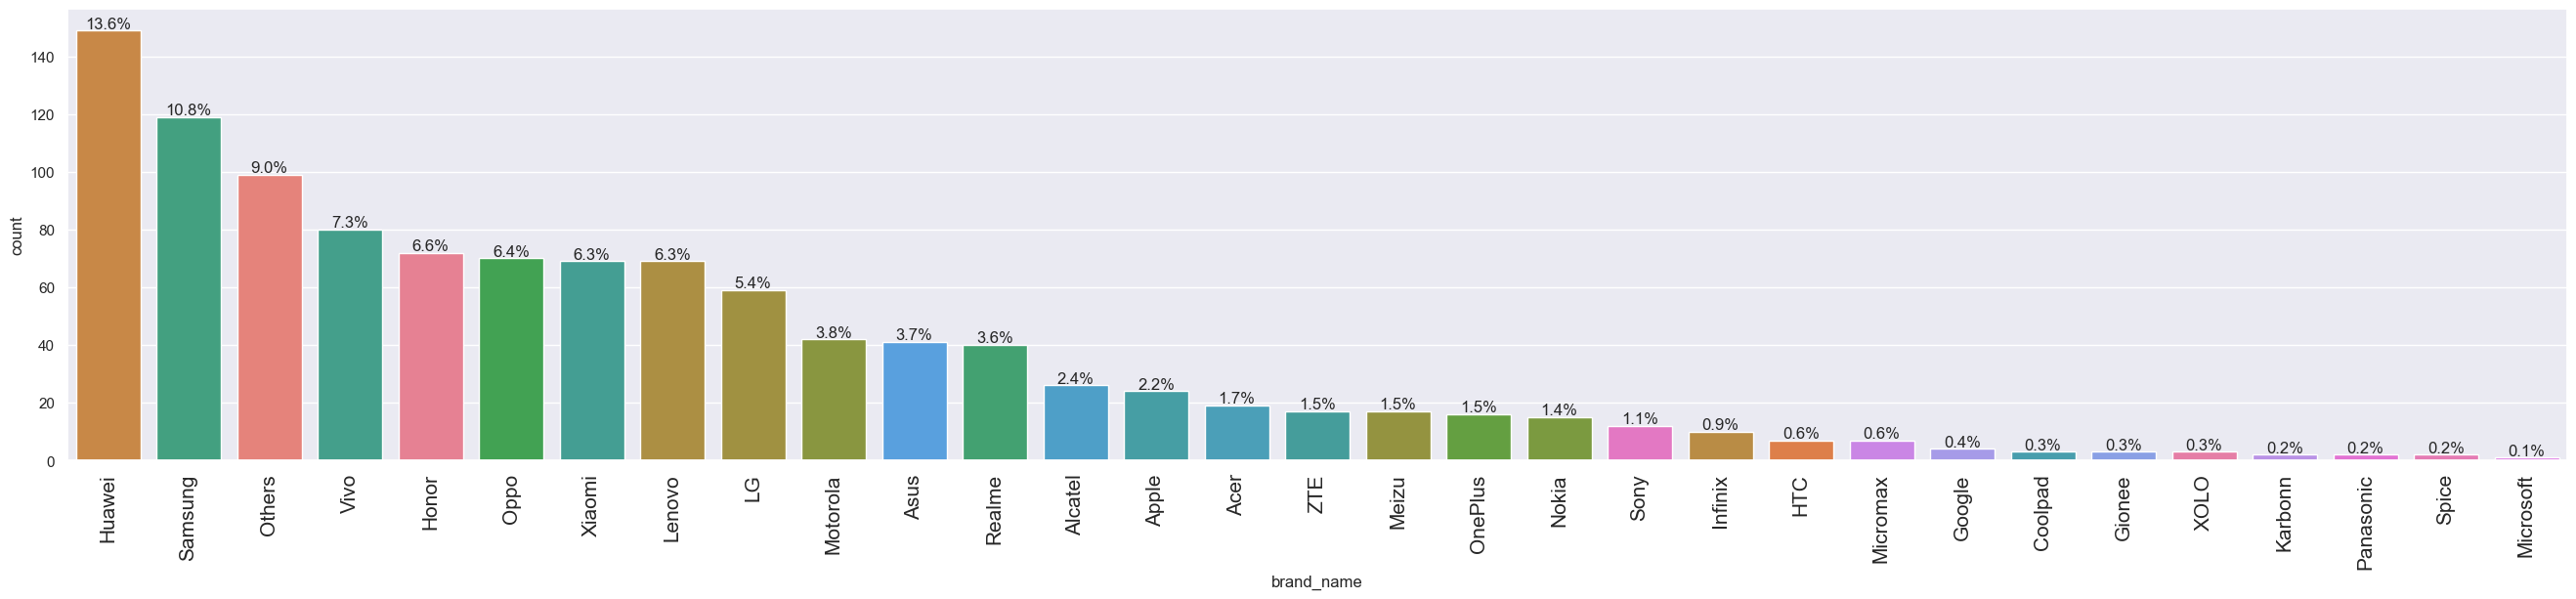

In [67]:
# Labeled bar plot for screen sizes greater than 6 inches, grouped by brand.
labeled_barplot(df_large_screen,'brand_name', perc=True)

* There are 1099 devices in the dataset with the screen larger then 6 inches.
* The brand with the most devices having screens larger than 6 inches is Huawei.

In [69]:
# Creating filtered dataset with selfie camera megapixels greater then 8
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

* There are 655 devices in the dataset with selfie camera megapixels greater then 8

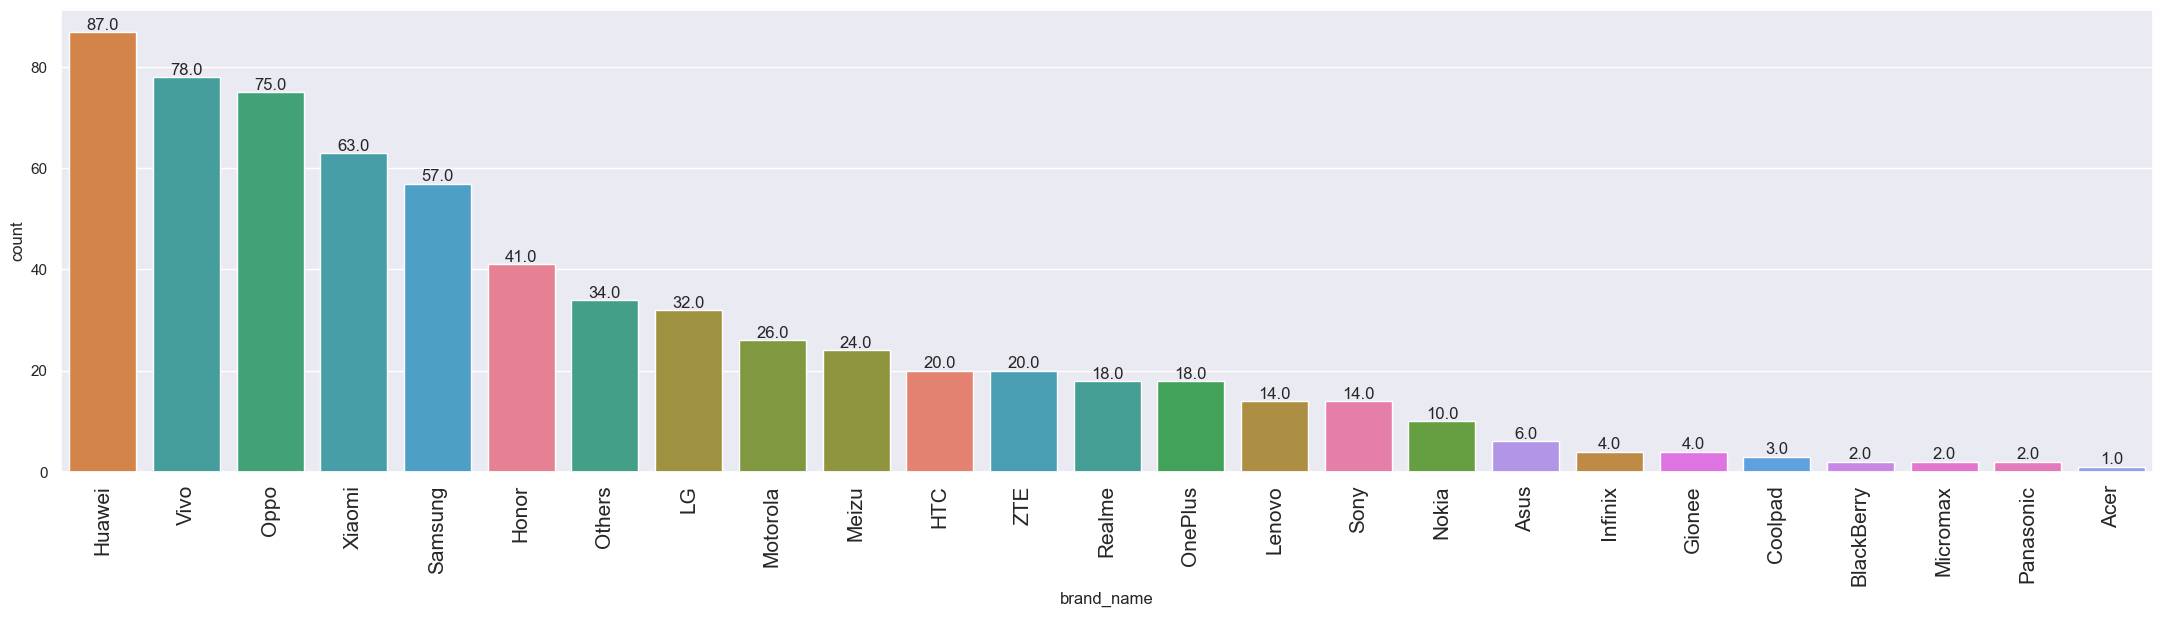

In [71]:
# Labeled bar plot for selfie camera megapixels greater then 8, grouped by brand.
labeled_barplot(df_selfie_camera, 'brand_name')

* The three brands with the most devices featuring selfie camera megapixels greater than 8 are Huawei, Vivo, and Oppo.

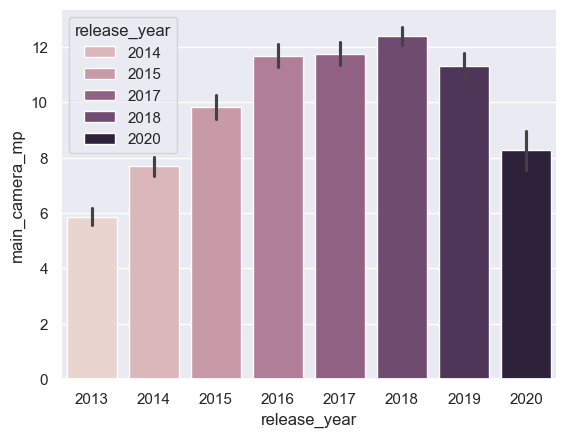

In [73]:
# Checking the average main camera MP by the release year
sns.barplot(data=df, x='release_year', y='main_camera_mp', hue='release_year')
plt.show()

* From 2013 to 2018, the main camera megapixels increased steadily each year. However, for 2019 and 2020, there was a decline, which is unexpected. We might need to look deeper into it.

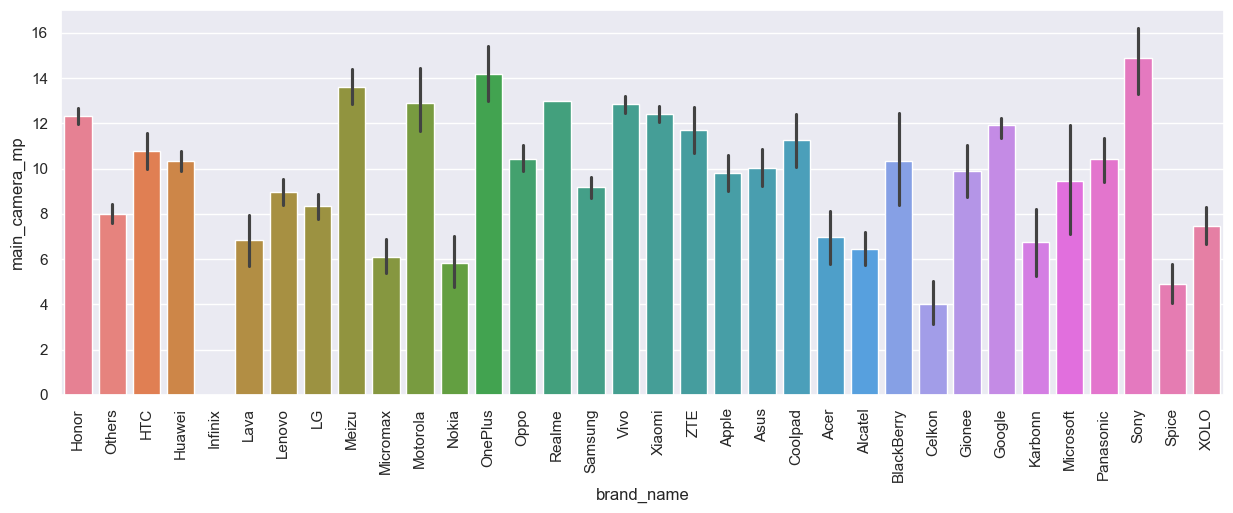

In [75]:
# Checking main camera MP by brand.
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x='brand_name', y='main_camera_mp', hue='brand_name')
plt.xticks(rotation=90)
plt.show()

* Sony has the highest average main camera megapixels.

In [77]:
# Creating filtered dataset with main camera megapixels greater then  16
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

* There are 94 devices in the datase with main camera megapixels greater then 16

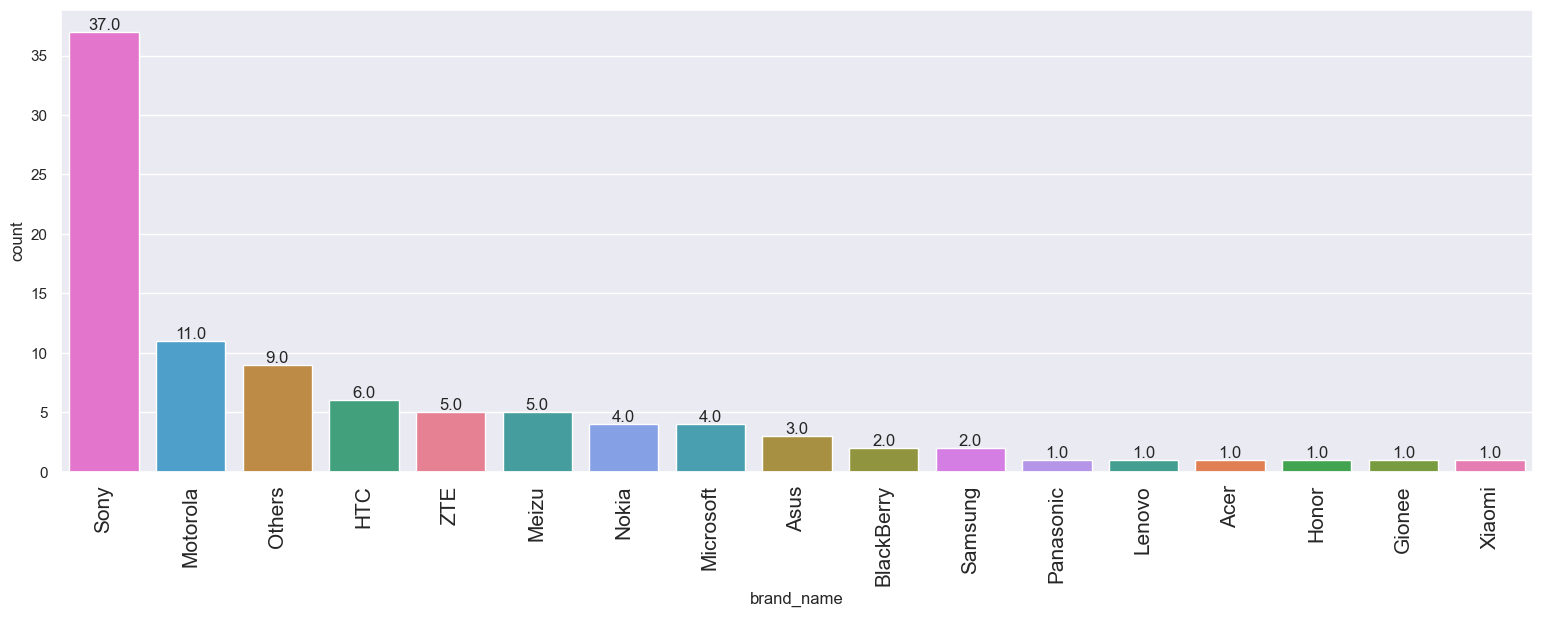

In [79]:
labeled_barplot(df_main_camera, "brand_name")

* The dominant brand with main camera megapixels greater than 16 is Sony, with 37 devices, followed by Motorola with 11 devices.

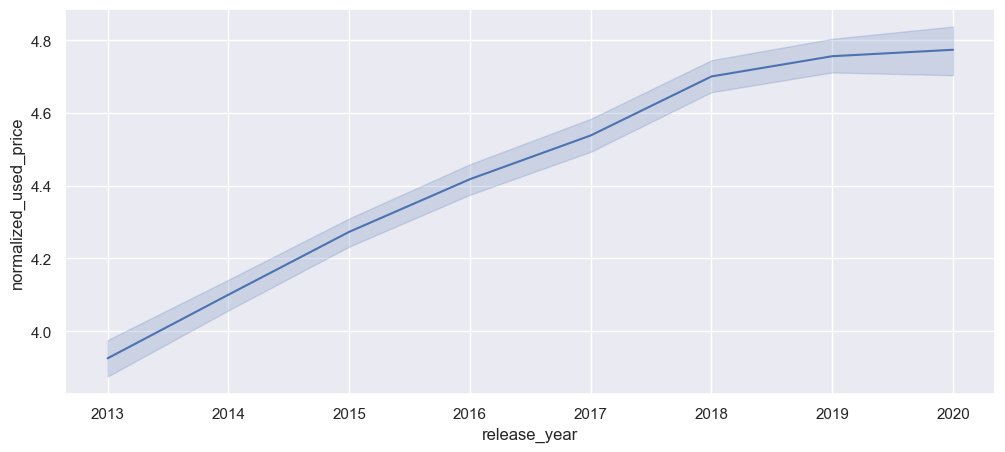

In [81]:
# Checking how the release year affects used device prices with a lineplot.
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='release_year', y='normalized_used_price')
plt.show()

* From the visualization above, we can see that the newer the device, the higher the price.

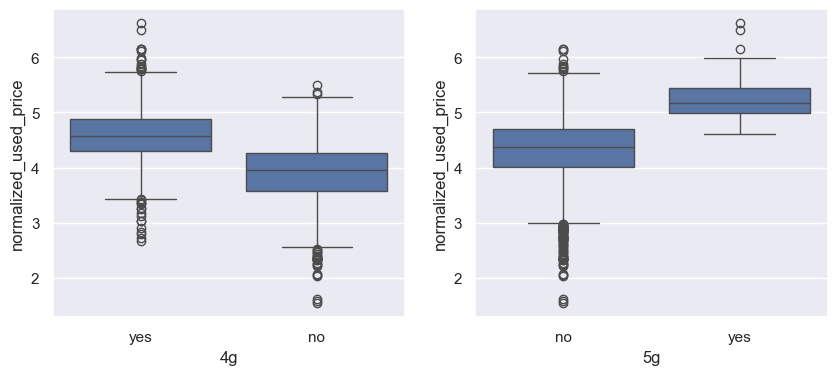

In [83]:
# Checking the normalized used and new prices of the devices with 4g, 5g, and without.
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

* From the visualization above, it’s clear that devices with 4G and 5G are priced higher than those without these technologies.

## Data Preprocessing

In [87]:
# Creating a copy of the dataset for further manipulation.
df1=df.copy()

In [88]:
# Checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* Most missing values are in the column "main_camera_mp".
* There are also a small number of missing values in some other columns.

In [90]:
# Treating missing values with the median, grouped by brand name and release year
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name", "release_year"])[col].transform("median")
    )  

# Checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* Some columns are treated, but not all

In [92]:
# Treating the rest of the columns with median, grouped by release year.
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year'])[col].transform("median")
    )

# Checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### EDA 

In [95]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.456624,4.712036,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.186595,1298.991203,500.0,2100.0,3000.0,4000.0,9720.0


* No significant changes after treating the missing values.

In [97]:
# Adding a new column with the years since release instead of the release year for convenience
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

In [98]:
# Checking the dataset after the changes
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


In [99]:
df1.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
3449,Asus,Android,15.34,yes,no,12.2,8.0,64.0,6.0,5000.0,190.0,232,4.492337,6.483872,2
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,541,5.037732,6.251538,3
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,201,4.357350,4.528829,1
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,149,4.349762,4.624188,1
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,176,4.132122,4.279994,1


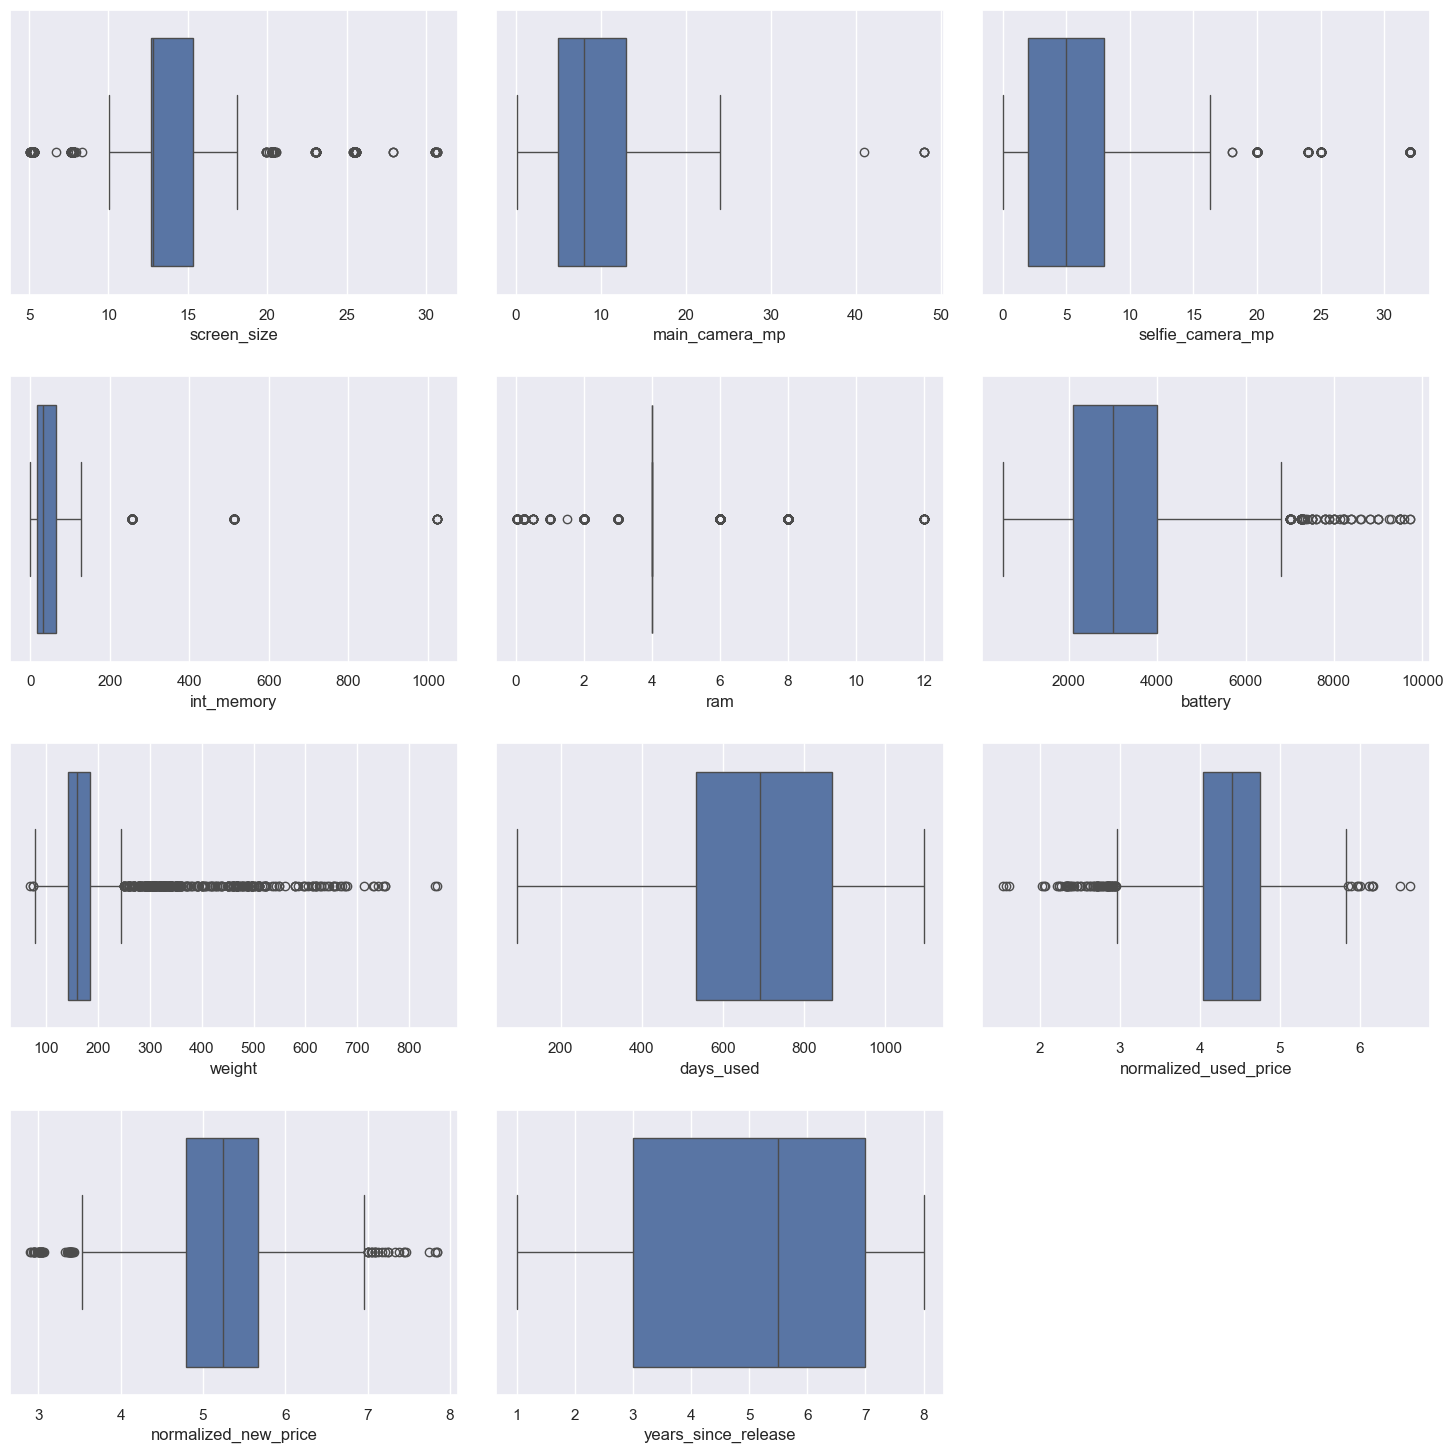

In [100]:
# Checking for outliers with boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There are many outliers in the dataset, but not all of them need to be treated, as they might represent real data.

### Data Preparation for Modeling

In [103]:
# Splitting the dataset into dependent (target) and independent (feature) variables for integration into an ML model
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [104]:
# Adding the intercept to data
X = sm.add_constant(X)

In [105]:
# Creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [106]:
# Converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [107]:
# Splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [108]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [110]:
# Fitting OLS model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     268.1
Date:                   Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                           00:49:55   Log-Likelihood:                 121.44
No. Observations:                   2417   AIC:                            -144.9
Df Residuals:                       2368   BIC:                             138.8
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


* The value for adj. R-squared is 0.722, which is good.
* The value for const coefficient is 1.3297      

## Model Performance Check

In [113]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [114]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230114,0.180569,0.844576,0.841358,4.332517


In [115]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238923,0.184918,0.841732,0.833875,4.506499


* The training $R^2$ is 0.84, indicating that the model is not underfitting.

* The train and test RMSE and MAE are comparable, the model is not overfitting.

* The MAE indicates that the model predicts the used price with an average error of 0.18 on the test data.

* MAPE of 4.5% on the test data means the model's predictions are within 4.5% of the actual normalized used price.ratings

## Checking Linear Regression Assumptions

#### Test for multicollinearity

In [120]:
# We'll check for multicollinearity with Variance  Inflation Factor (VIF)

#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [121]:
checking_vif(x_train)

,feature,VIF
0,const,228.927977
1,screen_size,7.681857
2,main_camera_mp,2.201646
3,selfie_camera_mp,2.815917
4,int_memory,1.361648
5,ram,2.284454
6,battery,4.042207
7,weight,6.372844
8,days_used,2.668196
9,normalized_new_price,3.146675


* There are some columns with moderate VIF values, indicating presence of moderate multicollinearity
* We will systematically remove numerical columns with a VIF greater than 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

In [123]:
# Function to remove Multicollinearity

def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # Empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # Build OLS models by dropping one of the high VIF columns at a time
    # Store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # Defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # Create the model
        olsmodel = sm.OLS(target, train).fit()

        # Adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # Creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [124]:
# Checking which column is less significant and can be removed first
col_list = ['screen_size', 'weight'] 
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838073,0.234926
1,weight,0.837828,0.235104


* Since screen size has less effect on the model, we will drop it.

In [126]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,203.869175
1,main_camera_mp,2.198450
2,selfie_camera_mp,2.812445
3,int_memory,1.359499
4,ram,2.284453
5,battery,3.805698
6,weight,2.961098
7,days_used,2.656258
8,normalized_new_price,3.104694
9,years_since_release,4.725253


* We removed multicollinearity in the data

In [128]:
# Checking the model again
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.0
Date:                   Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                           00:49:57   Log-Likelihood:                 95.650
No. Observations:                   2417   AIC:                            -95.30
Df Residuals:                       2369   BIC:                             182.6
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


* The adjusted R-squared dropped from 0.841 to 0.838, indicating that removing the column had a minimal impact on the model.* Since there is no multicollinearity, we can now examine the p-values of the predictor variables to assess their significance.e

In [130]:
# Dropping one by one the columns whith P-value above 0.05 as they are insagnificant, untill there will be no more columns with P-value above 0.05

# Initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # Fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes']


In [131]:
# Reassigning the dataset after removing the dropped columns
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [132]:
# Fitting updated atasets into the OLS model
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     962.8
Date:                   Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                           00:49:57   Log-Likelihood:                 78.316
No. Observations:                   2417   AIC:                            -128.6
Df Residuals:                       2403   BIC:                            -47.57
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [133]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234256,0.183127,0.83893,0.837991,4.402485


In [134]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240971,0.18615,0.839007,0.836801,4.543039


* All features now have p-values less than 0.05, so we will use the features in x_train3 as our final set of predictors and olsmod2 as the final model moving forward.
* The adjusted R-squared is now 0.838, meaning our model explains approximately 84% of the variance.
* The adjusted R-squared in olsmod1 (with variables adjusted for multicollinearity) was also 0.838. This indicates that the variables we dropped did not  impact the model.
* The RMSE and MAE values are similar for both the training and test sets, suggesting that the model is not overfitting.

#### Test For Linearity and Independence

In [137]:
# Creating a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmod2.fittedvalues
df_pred["Residuals"] = olsmod2.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.877531,0.209956
1525,4.448399,4.607248,-0.158848
1128,4.315353,4.296975,0.018377
3003,4.282068,4.244285,0.037784
2907,4.456438,4.466413,-0.009974


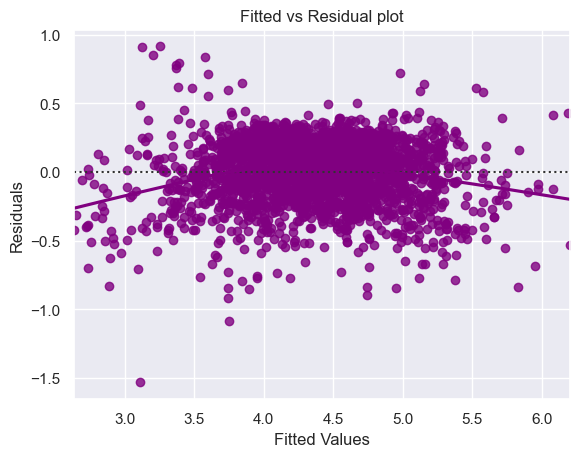

In [138]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* We see no pattern in the plot above. The assumptions of linearity and independence are satisfied.

#### Test for Normality

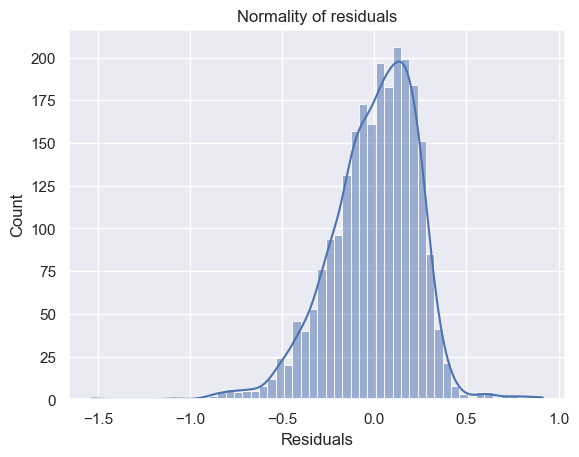

In [141]:
# Plotting the residuals in hist plot to check for normality
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals does have a bell shape, but a little skewed to the left
* Let's check the Q-Q plot.

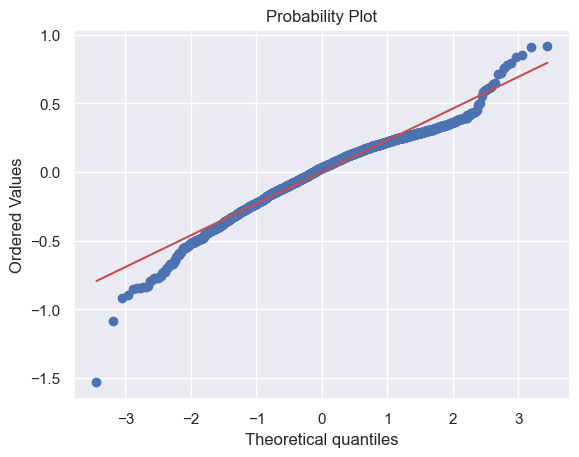

In [143]:
# Checking residuals with Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow a straight line except for the tails.

In [145]:
# Checking residuals with Shapiro-Wilk test.
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9688559770584106, pvalue=1.7552336894720076e-22)

* P-value is < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* However, oh the hist plot we saw it is close to bell shape, we can accept this distribution as close to being normal.

####  Test for Homoscedasticity

In [148]:
# We will use the goldfeldquandt test to check for homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0099551634827326), ('p-value', 0.43205124950194096)]

* Since p-value > 0.05, we can say that the residuals are homoscedastic. This assumption is satisfied.

In [150]:
# Predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.392198
2341,3.696103,3.983403
1913,3.592093,3.654122
688,4.306495,4.077829
650,4.522115,5.109660
2291,4.259294,4.372508
40,4.997685,5.463649
1884,3.875359,4.063257
2538,4.206631,4.037063
45,5.380450,5.293992


* We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [153]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [154]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     962.8
Date:                   Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                           00:49:59   Log-Likelihood:                 78.316
No. Observations:                   2417   AIC:                            -128.6
Df Residuals:                       2403   BIC:                            -47.57
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [155]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234256,0.183127,0.83893,0.837991,4.402485


In [156]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240971,0.18615,0.839007,0.836801,4.543039


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.5% of the used prise

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

* The model explains approximately 84% of the variation in the data and achieves an accuracy at 4.5% for the normalized used device prices on the test data, indicating good performance of the model.
* An increase of one unit in the main camera megapixels corresponds to a 0.0211 unit increase in the normalized used device prices, assuming all other variables remain constant.
* A one-unit increase in RAM results in a 0.0193 unit increase in the normalized used device prices, with all other variables held constant.
* If the years since release increase by one unit, the normalized used price decreases by 0.0300 units, assuming all other variables are held constant.
* The average normalized used device price is approximately 4.4
* Android OS dominates the dataset, with 93.1% of used devices running on Android.
* Used device prices are highly correlated with new device prices.
* Continue to refine the model and incorporate additional features or data sources to improve predictive accuracy further and better understand market dynamics.
* Maintain stock availability of devices with higher-quality cameras, more RAM, and faster internet connectivity, as these features are associated with higher prices and greater revenue potential.

___